## This is a notebook that use Linear Regression to predict the Cummulative Grade Point


#Import modules


In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#Loading the dataset

In [2]:
#Load the data
df = pd.read_excel (r'C:\Users\Dell\Downloads\Y3S3.xlsx', sheet_name='Sheet1')


In [3]:
#Display the first 7 row of data
df.head(7)

,Gender,State,UBTM1013,UCCD1113,UCCD3033,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
0,Female,Pahang,71,79,49,2.333333,2.862222,2.880189
1,Male,Kedah,73,84,74,3.433333,2.948889,2.996226
2,Male,Malacca,54,70,81,3.000000,2.993333,2.960377
3,Female,Kelantan,75,68,72,3.200000,2.962222,2.990566
4,Male,Perak,68,67,52,2.666667,2.871111,2.882075
5,Male,Johor,72,64,76,3.100000,2.683333,2.776415
6,Female,Negeri Sembilan,61,52,64,2.466667,2.898889,2.953774


In [4]:
#Count the number of rows and columns in the data set
df.shape

(10000, 8)

In [5]:
#Find the column that consist null value
df.isna().sum()

Gender            0
State             0
UBTM1013          0
UCCD1113          0
UCCD3033          0
Semester2_GPA     0
Semester2_CGPA    7
Semester3_CGPA    7
dtype: int64

In [6]:
#Remove the row that consist of null value
df1=df.dropna()

In [7]:
#Check the if there still any null value
df1.isna().sum()

Gender            0
State             0
UBTM1013          0
UCCD1113          0
UCCD3033          0
Semester2_GPA     0
Semester2_CGPA    0
Semester3_CGPA    0
dtype: int64

In [8]:
df1.describe()

,UBTM1013,UCCD1113,UCCD3033,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
count,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000,9993.000000
mean,55.951866,65.888422,65.942360,2.839188,2.869392,2.881424
std,17.126267,8.405711,8.372405,0.347447,0.102527,0.091224
min,21.000000,41.000000,43.000000,0.666667,2.420430,2.524528
25%,41.000000,60.000000,60.000000,2.666667,2.803333,2.819811
50%,60.000000,66.000000,66.000000,2.866667,2.872222,2.882075
75%,69.000000,72.000000,72.000000,3.100000,2.938889,2.944340
max,90.000000,89.000000,89.000000,3.700000,3.235556,3.234906


In [9]:
df1.dtypes

Gender             object
State              object
UBTM1013            int64
UCCD1113            int64
UCCD3033            int64
Semester2_GPA     float64
Semester2_CGPA    float64
Semester3_CGPA    float64
dtype: object

#Exploratory Data Analysis

[Text(0.5, 1.0, 'Year 3 Semester 3 CGPA')]

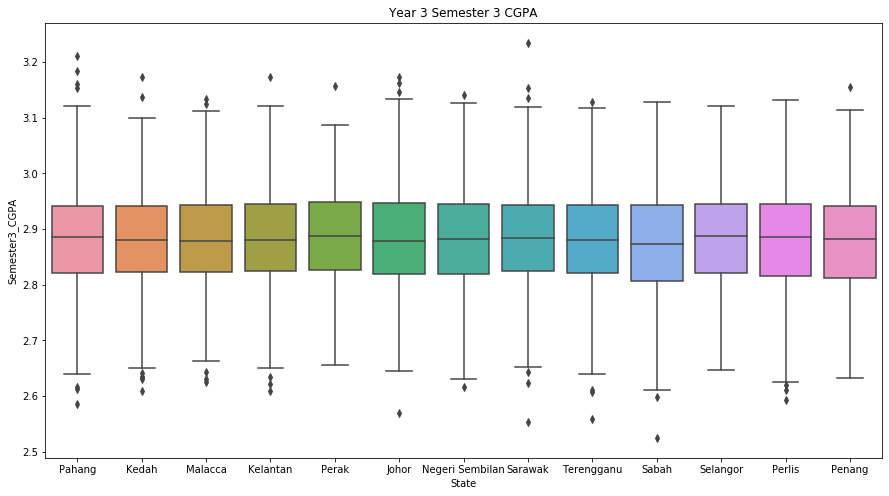

In [10]:
plt.figure(figsize=(15,8))
sns.boxplot(x='State', y='Semester3_CGPA',data=df1).set(title='Year 3 Semester 3 CGPA')

In [11]:
gen =df1[df1['Semester3_CGPA'].between(2.8,3.3)]

In [12]:
#Get a count of the number of each state
gen['State'].value_counts()

Johor              651
Negeri Sembilan    651
Terengganu         646
Malacca            646
Perlis             641
Kelantan           632
Sarawak            627
Kedah              623
Selangor           616
Perak              605
Pahang             599
Sabah              593
Penang             578
Name: State, dtype: int64

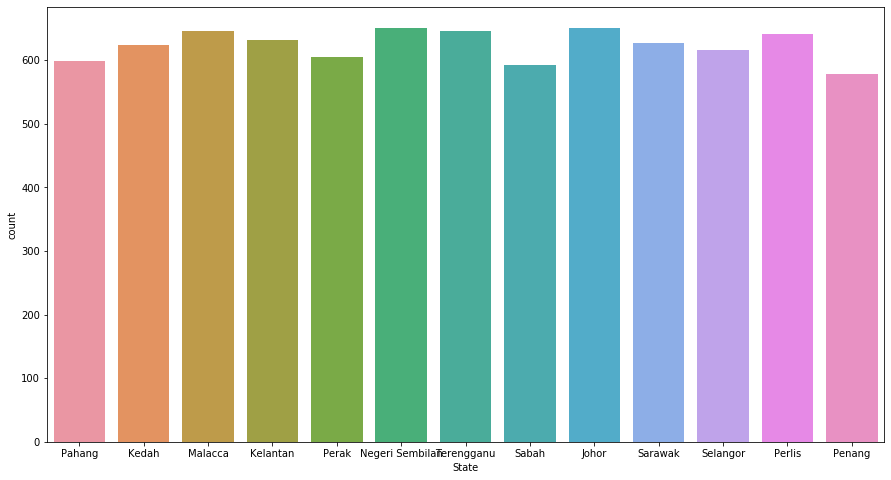

In [13]:
#Visualize the count of Grade
plt.figure(figsize=(15,8))
sns.countplot(gen['State'], label='count')

In [14]:
#Get a count of the number of each Gender
gen['Gender'].value_counts()


Male      4062
Female    4046
Name: Gender, dtype: int64

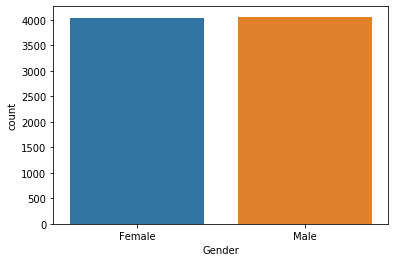

In [15]:
#Visualize the count of Gender
sns.countplot(gen['Gender'], label='count')

#Drop the column that does not related

In [16]:
df1.drop(['Gender','State'], axis='columns', inplace=True)

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df1.shape

(9993, 6)

In [18]:
#Print the data after dropping the columns
df1.head()

,UBTM1013,UCCD1113,UCCD3033,Semester2_GPA,Semester2_CGPA,Semester3_CGPA
0,71,79,49,2.333333,2.862222,2.880189
1,73,84,74,3.433333,2.948889,2.996226
2,54,70,81,3.000000,2.993333,2.960377
3,75,68,72,3.200000,2.962222,2.990566
4,68,67,52,2.666667,2.871111,2.882075


#Splitting the data

In [19]:
#Split the data set into independent(X) and dependent(Y) data sets
y = df1.iloc[:,-1:]
X = df1.iloc[:,:-1]

In [20]:
#Split the data set into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

#Feature Scaling

In [21]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

#Model Training

In [22]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
print("Accuracy:" ,model.score(X_test, y_test)*100)

Accuracy: 72.57030278495536


In [24]:
prediction = model.predict(X_test)
print(prediction)
print(y_test)

[[2.77667274]
 [3.00151572]
 [2.98140099]
 ...
 [2.76693819]
 [2.82526132]
 [2.90010777]]
      Semester3_CGPA
3632        2.758491
6808        3.036792
8467        2.983019
9682        2.891509
7071        2.929245
...              ...
5227        2.803774
3530        3.037736
6102        2.786792
295         2.783019
850         2.831132

[2998 rows x 1 columns]


In [25]:
import pickle 
pickle_out = open("Y3S3.pkl", mode = "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()